# Import

In [1]:
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 2.76 ms (started: 2022-06-27 14:30:28 +00:00)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm

time: 1.45 s (started: 2022-06-27 14:30:28 +00:00)


# Assets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.07 s (started: 2022-06-27 14:30:30 +00:00)


In [4]:
cd drive/MyDrive/Project_DIP/DatasetRockPaperScissors

/content/drive/MyDrive/Project_DIP/DatasetRockPaperScissors
time: 7.34 ms (started: 2022-06-27 14:30:33 +00:00)


In [5]:
directories = os.listdir()
filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + '/' + files[j]
    label.append(directories[i])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

['paper/0RA9rcrv8iVvuDDU.png', 'paper/0a3UtNzl5Ll3sq8K.png', 'paper/0Uomd0HvOB33m47I.png', 'paper/0cb6cVL8pkfi4wF6.png', 'paper/04l5I8TqdzF9WDMJ.png', 'paper/0Og76sl5CJhbxWWx.png', 'paper/0t08v9bAaA0mXGCQ.png', 'paper/0eqArS2GgsBeqgSn.png', 'paper/2PiUTczN5Ez4VreF.png', 'paper/1yKjzquSvl9ShK7K.png', 'paper/1fKclJk4eBWOQSR1.png', 'paper/27XFtQjjXQ8AP8Tl.png', 'paper/14K62H4KG1hg5qiJ.png', 'paper/2F8Ng7620ANA7tEK.png', 'paper/1Tt9U9SzrOm98Xtw.png', 'paper/1Frbe8cdOdkciOBg.png', 'paper/2IOsxsG8AaxntdJM.png', 'paper/2UKnsncgPodQLOFR.png', 'paper/0vugygEjxQJPr9yz.png', 'paper/2DQbLQfHlfrcATqi.png', 'paper/1jHtb93pI8f6pfKo.png', 'paper/1yeoLbmp4alVOtFv.png', 'paper/0zKU6wEhT2cDe9j0.png', 'paper/2OCAZGNv2OEzgAwU.png', 'paper/1uoW7QcH2qAgCTxv.png', 'paper/1oKnUgV2CdCaQUUX.png', 'paper/2SldJqjiZwIVPef9.png', 'paper/2PAcPusQ59xIMfiw.png', 'paper/1Dfw5FRlS4h60JPX.png', 'paper/7I1fABs6SL1T4MNb.png', 'paper/5jcXrtjEVtQwI0Wa.png', 'paper/4fCqIVTEuFLsQMaZ.png', 'paper/5Iz9WPYz1C3PKWxj.png', 'paper/4I

In [6]:
data = {"filename" : filename, 
        "label": label 
        }
df = pd.DataFrame(data=data)

df_shuffled = df.sample(frac=1)
dataset = df_shuffled
dataset

,filename,label
482,paper/vvM7nA8hZJD5b9CL.png,paper
768,rock/BYoDUgGsCMmAIF9I.png,rock
1426,rock/iVsm6EbRk1J1cEGN.png,rock
1384,rock/oJgp2GfiHRHchjDv.png,rock
1155,rock/Wn0jBu6LOl5Ei5GN.png,rock
...,...,...
1196,rock/evxvBwQgL8Kvv67C.png,rock
2018,scissors/vLsE4fWvRdNXdkvb.png,scissors
855,rock/9a9TiJDB5oAWqO9U.png,rock
1455,scissors/6weMqPPWdXLD7lNy.png,scissors


time: 29.7 ms (started: 2022-06-27 14:30:33 +00:00)


#Image Preprocessing

In [7]:
# baca data dengan opencv (ditampilkan gambar)

def load_images_files(train_data):
  # definisikan 2 list kosong
  images = []
  Y = []

  for obj in train_data.values:
    # index 0 ([0]) adalah kolom filename, (tidak menggunakan label karena untuk cv2 baca lewat lokasi nya)
    img = cv2.imread(obj[0])
    # smoothing
    img_pred = cv2.GaussianBlur(img, (5, 5), 0)
    # sharpening
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    img_pred = cv2.filter2D(img_pred, -1, kernel)
    # resize
    img_pred = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    # ubah rentang pixel yang awalnya 0 - 255 menjadi 0 - 1
    img_pred = img_pred / 255
    # algoritma nearest neighbour bekerja pada 1 dimensi
    # ada 3 perkalian karena gambar berwarna, punya 3 channel rgb
    img_pred = img_pred.reshape(img_pred.shape[0] * img_pred.shape[1] * img_pred.shape[2])
    
    # masukkan ke list images
    images.append(img_pred)
    # tiap row yang ada di Y merepresentasikan label yang ada di images
    Y.append(obj[1])
    
  X = np.array(images)
  Y = np.array(Y)
  
  return X, Y

time: 26.9 ms (started: 2022-06-27 14:30:33 +00:00)


In [34]:
# Split into training and testing data
X, y = load_images_files(dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.3) #test size = 30% untuk testing, 70% untuk training

print("Data shape: ", X.shape)
print(y.shape)
print("X_train: ", X_train.shape) #70% dari data shape
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape) #30% dari data shape
print("y_test: ", y_test.shape)

Data shape:  (2188, 49152)
(2188,)
X_train:  (1531, 49152)
y_train:  (1531,)
X_test:  (657, 49152)
y_test:  (657,)
time: 18.6 s (started: 2022-06-27 14:59:35 +00:00)


# Method

## Gaussian Naive Bayes

In [35]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
GNBVal = metrics.accuracy_score(y_test, y_pred)*100
print("Gaussian Naive Bayes model accuracy(in %):", GNBVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Gaussian Naive Bayes model accuracy(in %): 75.95129375951294

Confusion Matrix
[[153  26  12]
 [ 45 190  43]
 [ 18  14 156]]

time: 3.61 s (started: 2022-06-27 15:00:11 +00:00)


In [36]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 26
Jumlah False Negative = 45
Jumlah True Positive = 190
Jumlah True Negative = 153

Accuracy : 0.83
Precision : 0.88
Recall : 0.81
F1 Score : 0.42

time: 21 ms (started: 2022-06-27 15:00:23 +00:00)


##Random Forest

In [11]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

rf = ensemble.RandomForestClassifier(n_estimators=500)

# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
RFVal = accuracy_score(y_test, y_pred)*100
print("Random Forest model accuracy(in %):", RFVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Random Forest model accuracy(in %): 93.45509893455099

Confusion Matrix
[[197   6   4]
 [  6 213   3]
 [ 13  11 204]]

time: 1min 15s (started: 2022-06-27 14:31:19 +00:00)


In [12]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 6
Jumlah False Negative = 6
Jumlah True Positive = 213
Jumlah True Negative = 197

Accuracy : 0.97
Precision : 0.97
Recall : 0.97
F1 Score : 0.49

time: 13.3 ms (started: 2022-06-27 14:32:35 +00:00)


##Decision Tree

In [13]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", random_state = 100, 
        max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", random_state = 100,
        max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
# Function to make predictions
def DTprediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred
      
# Building Phase
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
  
# Prediction using gini
y_pred_gini = DTprediction(X_test, clf_gini)
DTVal =accuracy_score(y_test,y_pred)*100
print("Decision Tree model accuracy(in %):",DTVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Decision Tree model accuracy(in %): 93.45509893455099

Confusion Matrix
[[197   6   4]
 [  6 213   3]
 [ 13  11 204]]

time: 39.1 s (started: 2022-06-27 14:32:35 +00:00)


In [14]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 6
Jumlah False Negative = 6
Jumlah True Positive = 213
Jumlah True Negative = 197

Accuracy : 0.97
Precision : 0.97
Recall : 0.97
F1 Score : 0.49

time: 13 ms (started: 2022-06-27 14:33:14 +00:00)


##K-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

KNNVal = 0

for i in range(1, 16):
  knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  KNNVal = accuracy_score(y_test, y_pred)*100
  print('K=', i, 'Accuracy Score(in %):', KNNVal)

print("")

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

K= 1 Accuracy Score(in %): 94.67275494672755
K= 2 Accuracy Score(in %): 94.06392694063926
K= 3 Accuracy Score(in %): 94.3683409436834
K= 4 Accuracy Score(in %): 93.9117199391172
K= 5 Accuracy Score(in %): 94.82496194824962
K= 6 Accuracy Score(in %): 94.67275494672755
K= 7 Accuracy Score(in %): 94.82496194824962
K= 8 Accuracy Score(in %): 94.3683409436834
K= 9 Accuracy Score(in %): 94.06392694063926
K= 10 Accuracy Score(in %): 92.99847792998477
K= 11 Accuracy Score(in %): 93.45509893455099
K= 12 Accuracy Score(in %): 93.30289193302892
K= 13 Accuracy Score(in %): 93.75951293759512
K= 14 Accuracy Score(in %): 92.99847792998477
K= 15 Accuracy Score(in %): 93.15068493150685

Confusion Matrix
[[201   7   7]
 [  6 221   4]
 [  9   2 200]]

time: 1min 5s (started: 2022-06-27 14:33:14 +00:00)


In [16]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 7
Jumlah False Negative = 6
Jumlah True Positive = 221
Jumlah True Negative = 201

Accuracy : 0.97
Precision : 0.97
Recall : 0.97
F1 Score : 0.49

time: 27.7 ms (started: 2022-06-27 14:34:20 +00:00)


##SVM

In [17]:
#Classify the image using SVM Classifier
from sklearn import svm
#Createasvm Classifier
clf=svm.SVC(kernel='poly')#Linear Kernel
#Train the model using the training sets
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=clf.predict(X_test)

SVMVal = accuracy_score(y_test,y_pred)*100
print("Accuracy Score (in %):", SVMVal)
print("")

CM = confusion_matrix(y_pred, y_test)
print("Confusion Matrix")
print(CM)
print("")

Accuracy Score (in %): 95.73820395738204

Confusion Matrix
[[203   5   3]
 [  6 220   2]
 [  7   5 206]]

time: 51.6 s (started: 2022-06-27 14:34:20 +00:00)


In [18]:
FP = CM[0][1] 
FN = CM[1][0]
TP = CM[1][1]
TN = CM[0][0]
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Precision
PR = (TP)/(TP+FP)
# Recall
RE = (TP)/(TP+FN)
# F1 Score
F1 = (PR*RE)/(PR+RE)

print("Jumlah False Positive = " + str(FP))
print("Jumlah False Negative = " + str(FN))
print("Jumlah True Positive = " + str(TP))
print("Jumlah True Negative = " + str(TN))
print("")
print("Accuracy : " + str(round(ACC,2)))
print("Precision : " + str(round(PR,2)))
print("Recall : " + str(round(RE,2)))
print("F1 Score : " + str(round(F1,2)))
print("")

Jumlah False Positive = 5
Jumlah False Negative = 6
Jumlah True Positive = 220
Jumlah True Negative = 203

Accuracy : 0.97
Precision : 0.98
Recall : 0.97
F1 Score : 0.49

time: 23 ms (started: 2022-06-27 14:35:11 +00:00)


##K-Fold Cross Validation


#### Gaussian Naive Bayes

In [37]:
gnb = GaussianNB()
gnb_cvs=cross_val_score(gnb, X, y, cv=5).mean()
print(gnb_cvs)
print("")

0.7819953397490153

time: 11.2 s (started: 2022-06-27 15:00:33 +00:00)


#### Random Forest

In [20]:
rf=ensemble.RandomForestClassifier(n_estimators=500)
rf_cvs=cross_val_score(rf, X, y, cv=5).mean()
print(rf_cvs)
print("")

0.9538394825658548

time: 7min 19s (started: 2022-06-27 14:35:22 +00:00)


#### Decision Tree

In [21]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt_cvs = cross_val_score(dt, X, y, cv=5).mean()
print(dt_cvs)
print("")

0.7673761533076288

time: 1min 33s (started: 2022-06-27 14:42:42 +00:00)


#### K-Nearest Neighbors

In [22]:
knn = KNeighborsClassifier(n_neighbors=1,metric='euclidean') # 0.9555713229859573
#knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan') # 0.9338083271741808
#knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski') # 0.9555713229859573
#knn = KNeighborsClassifier(n_neighbors=1, metric='chebyshev') # 0.8027563439270757
knn_cvs = cross_val_score(knn, X, y, cv=5).mean()
print(knn_cvs)
print("")

0.955678505376007

time: 16.3 s (started: 2022-06-27 14:44:16 +00:00)


#### SVM

In [23]:
#svm_val = svm.SVC(kernel='poly') # 0.9564602118748461
#svm_val = svm.SVC(kernel='linear') # 0.9227011579206701
#svm_val = svm.SVC(kernel='sigmoid') # 0.3465139196846514
svm_val = svm.SVC(kernel='rbf') # 0.956909583641291
svm_cvs=cross_val_score(svm_val, X, y, cv=5).mean()
print(svm_cvs)

0.9561246773873335
time: 9min 7s (started: 2022-06-27 14:44:32 +00:00)


### Graph

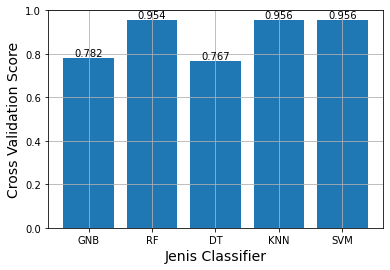

time: 184 ms (started: 2022-06-27 14:54:26 +00:00)


In [27]:
import matplotlib.pyplot as plt

# labels for bars
x = ['GNB', 'RF', 'DT', 'KNN', 'SVM']

# heights of bars
y = [round(gnb_cvs, 3), round(rf_cvs, 3), round(dt_cvs, 3), round(knn_cvs, 3), round(svm_cvs, 3)]
 
# plotting a bar chart
plt.bar(x, y)

# add value labels
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

# plot title
# plt.title('Perbandingan Cross Validation Score untuk tiap jenis Classifier', fontsize=14)
# naming the x-axis
plt.xlabel('Jenis Classifier', fontsize=14)
# naming the y-axis
plt.ylabel('Cross Validation Score', fontsize=14)

plt.ylim(0,1)

plt.grid(True)
# function to show the plot
plt.show()

#Testing

In [28]:
def load_single_image_files(path):
    images = []
    img = cv2.imread(path)
    # smoothing
    img_pred = cv2.GaussianBlur(img, (5, 5), 0)
    # sharpening
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    img_pred = cv2.filter2D(img_pred, -1, kernel)
    # resize
    img_pred = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    # ubah rentang pixel yang awalnya 0 - 255 menjadi 0 - 1
    img_pred = img_pred / 255
    # algoritma nearest neighbour bekerja pada 1 dimensi
    # ada 3 perkalian karena gambar berwarna, punya 3 channel rgb
    img_pred = img_pred.reshape(img_pred.shape[0] * img_pred.shape[1] * img_pred.shape[2])
    
    # masukkan ke list images
    images.append(img_pred)
    
    X = np.array(images)
    return X

time: 16.2 ms (started: 2022-06-27 14:54:34 +00:00)


Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL (4).png

Prediksi menggunakan Gaussian Naive Bayes
['scissors']

Prediksi menggunakan Random Forest
['scissors']

Prediksi menggunakan DT (Decission Tree) Classifier
['scissors']

Prediksi menggunakan K-Nearest Neighbor
['scissors']

Prediksi menggunakan SVM (Support Vector Machine) Classifier
['scissors']



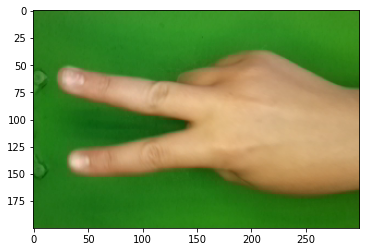

time: 1min 36s (started: 2022-06-27 15:18:04 +00:00)


In [44]:
from matplotlib import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  #Predicting images
  path = fn

  X_single = load_single_image_files(path)

  img =  cv2.imread(path)
  imgshow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  imgplot = plt.imshow(imgshow)

  print("")

  gnb.fit(X_train, y_train)
  nb_pred_single = gnb.predict(X_single)
  print("Prediksi menggunakan Gaussian Naive Bayes")
  print(nb_pred_single)

  print("")

  rf.fit(X_train, y_train)
  rf_pred_single = rf.predict(X_single)
  print("Prediksi menggunakan Random Forest")
  print(rf_pred_single)

  print("")
  
  dt_pred_single = DTprediction(X_single, clf_gini)
  print("Prediksi menggunakan DT (Decission Tree) Classifier")
  print(dt_pred_single)

  print("")

  knn.fit(X_train, y_train)
  knn_pred_single = knn.predict(X_single)
  print("Prediksi menggunakan K-Nearest Neighbor")
  print(knn_pred_single)

  print("")

  svm_pred_single = clf.predict(X_single)
  print("Prediksi menggunakan SVM (Support Vector Machine) Classifier")
  print(svm_pred_single)

  print("")